In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('PS4_GamesSales.csv', sep=',', encoding='latin-1')
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Verificar a dimensão da tabela
dados.shape

(1034, 9)

In [4]:
# Verificar o tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [5]:
# Renomear colunas
dados.rename(columns={
    'Game':'Jogos',
    'Genre':'Gênero',
    'Publisher':'Publicação',
    'North America':'America do Norte',
    'Europe':'Europa',
    'Japan':'Japão',
    'Rest of World':'Resto do Mundo',
    'Global':'Geral'    
    
}, inplace=True)

dados.head()

,Jogos,Year,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [6]:
# Verificar campos nulos
dados['Publicação'].isnull().sum()


209

In [7]:
dados.rename(columns={
    'Game':'Jogos',
    'Year':'Ano',
    'Genre':'Gênero',
    'Publisher':'Publicação',
    'North America':'America do Norte',
    'Europe':'Europa',
    'Japan':'Japão',
    'Rest of World':'Resto do Mundo',
    'Global':'Geral'    
    
}, inplace=True)

dados.head()


,Jogos,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [8]:
#Converter data para to_datetime
dados['Ano'] = pd.to_datetime(dados['Ano'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Jogos             1034 non-null   object        
 1   Ano               825 non-null    datetime64[ns]
 2   Gênero            1034 non-null   object        
 3   Publicação        825 non-null    object        
 4   America do Norte  1034 non-null   float64       
 5   Europa            1034 non-null   float64       
 6   Japão             1034 non-null   float64       
 7   Resto do Mundo    1034 non-null   float64       
 8   Geral             1034 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 72.8+ KB


In [9]:
#Avaliar dados da coluna Publicação

dados['Publicação'].value_counts()

Namco Bandai Games                56
Sony Interactive Entertainment    47
Ubisoft                           45
Square Enix                       40
Tecmo Koei                        37
                                  ..
Gaijinworks                        1
Futurlab 1                         1
Nowhere Studios                    1
BioWare                            1
Cygames                            1
Name: Publicação, Length: 152, dtype: int64

In [10]:
# Preencher vazios com valor especifico
dados['Publicação'] = dados['Publicação'].value_counts()['Namco Bandai Games']
dados.head()

,Jogos,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,1970-01-01 00:00:00.000002014,Action,56,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,1970-01-01 00:00:00.000002015,Shooter,56,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,1970-01-01 00:00:00.000002018,Action-Adventure,56,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,1970-01-01 00:00:00.000002017,Shooter,56,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,1970-01-01 00:00:00.000002017,Sports,56,1.27,8.64,0.15,1.73,11.80


In [11]:
# Preencher vazios com valor anterior ou posterior
dados['Ano'] = dados['Ano'].fillna(method='bfill')
dados.head()

,Jogos,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,1970-01-01 00:00:00.000002014,Action,56,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,1970-01-01 00:00:00.000002015,Shooter,56,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,1970-01-01 00:00:00.000002018,Action-Adventure,56,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,1970-01-01 00:00:00.000002017,Shooter,56,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,1970-01-01 00:00:00.000002017,Sports,56,1.27,8.64,0.15,1.73,11.80


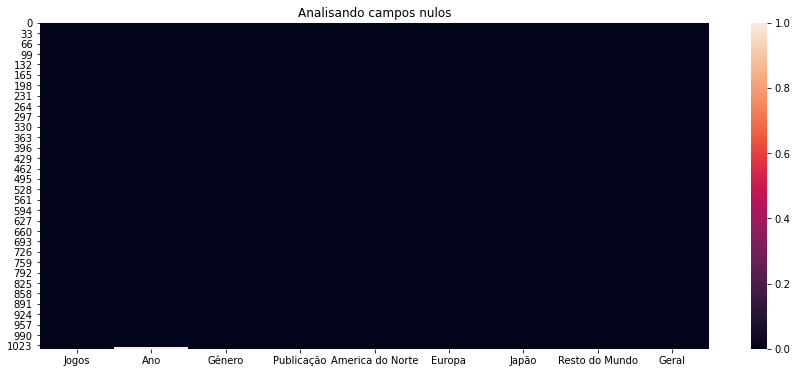

In [12]:
plt.figure(figsize=(15,6))
plt.title('Analisando campos nulos')
sns.heatmap(dados.isnull());

In [13]:
dados.isnull().sum()

Jogos               0
Ano                 3
Gênero              0
Publicação          0
America do Norte    0
Europa              0
Japão               0
Resto do Mundo      0
Geral               0
dtype: int64

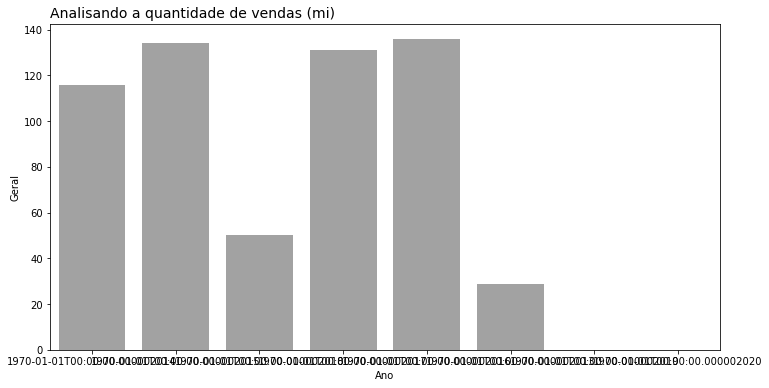

In [14]:
# Análise de vendas utilizando o barplot
plt.figure(figsize=(12,6))
plt.title('Analisando a quantidade de vendas (mi)', loc='left', fontsize=14)
plt.style.use('ggplot')

sns.barplot(data=dados, x='Ano', y='Geral', ci=None, color='#a2a2a2', estimator=sum);





In [15]:
# Fazer agrupamento por ano
dados.groupby(by=['Ano']).sum()

,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
Ano,,,,,,
1970-01-01 00:00:00.000002013,1960,10.35,12.88,0.97,4.57,28.76
1970-01-01 00:00:00.000002014,9576,39.80,54.12,3.58,18.29,115.85
1970-01-01 00:00:00.000002015,13440,49.60,56.29,7.28,20.89,134.09
1970-01-01 00:00:00.000002016,12824,47.40,57.98,9.74,20.71,135.81
1970-01-01 00:00:00.000002017,14896,44.77,57.20,9.08,19.89,130.93
1970-01-01 00:00:00.000002018,2184,19.65,18.70,4.13,7.69,50.20
1970-01-01 00:00:00.000002019,2408,0.00,0.00,0.00,0.00,0.00
1970-01-01 00:00:00.000002020,448,0.00,0.00,0.00,0.00,0.00


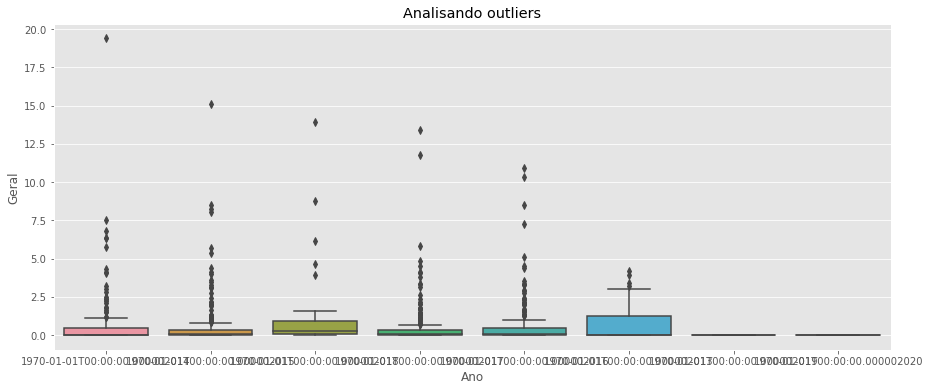

In [16]:
# Verificar outliers através de boxplot

plt.figure(figsize=(15,6))
plt.title('Analisando outliers')

sns.boxplot(data=dados, x='Ano', y='Geral');

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Jogos             1034 non-null   object        
 1   Ano               1031 non-null   datetime64[ns]
 2   Gênero            1034 non-null   object        
 3   Publicação        1034 non-null   int64         
 4   America do Norte  1034 non-null   float64       
 5   Europa            1034 non-null   float64       
 6   Japão             1034 non-null   float64       
 7   Resto do Mundo    1034 non-null   float64       
 8   Geral             1034 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 72.8+ KB
